In [15]:
# Import essential libraries
import numpy as np
import pandas as pd

# Import sklearn for datasets and model selection
from sklearn.model_selection import train_test_split

# Import sklearn for multi logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
# from sklearn.multioutput import MultiOutputClassifier   #removed from py version 1.7

# Evaluation Parameters
from sklearn.metrics import classification_report

# Import matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:

# Convert to DataFrame
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names=['sepal_len','sepal_wid','patel_len','patel_wid','species'])

# Display the first few rows
df.head()

,sepal_len,sepal_wid,patel_len,patel_wid,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   patel_len  150 non-null    float64
 3   patel_wid  150 non-null    float64
 4   species    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
df.isna().any()

sepal_len    False
sepal_wid    False
patel_len    False
patel_wid    False
species      False
dtype: bool

In [19]:
df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [20]:
##feature_name = df["species"].unique()  can use this

In [21]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder(sparse_output=False, handle_unknown= 'ignore')
target_array=ohe.fit_transform(df[["species"]])
target_name= ohe.get_feature_names_out(input_features=["species"])

In [22]:
 df1= pd.DataFrame(target_array, columns= target_name)

In [23]:
df=df.drop(labels = "species", axis=1)

In [24]:
df=df.join(df1)
df.head()

,sepal_len,sepal_wid,patel_len,patel_wid,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


In [25]:
features= df.iloc[:,:-3]
target=df.iloc[:,[-1,-2,-3]]

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
feature_scale = ss.fit_transform(features)
features = pd.DataFrame(feature_scale, columns=features.columns) 
features.head()

,sepal_len,sepal_wid,patel_len,patel_wid
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [27]:
corr_mat = df.corr(method='pearson')
corr_mat

,sepal_len,sepal_wid,patel_len,patel_wid,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
sepal_len,1.000000,-0.109369,0.871754,0.817954,-0.717416,0.079396,0.638020
sepal_wid,-0.109369,1.000000,-0.420516,-0.356544,0.595601,-0.464700,-0.130901
patel_len,0.871754,-0.420516,1.000000,0.962757,-0.922688,0.201587,0.721102
patel_wid,0.817954,-0.356544,0.962757,1.000000,-0.887510,0.118376,0.769134
species_Iris-setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000,-0.500000,-0.500000
species_Iris-versicolor,0.079396,-0.464700,0.201587,0.118376,-0.500000,1.000000,-0.500000
species_Iris-virginica,0.638020,-0.130901,0.721102,0.769134,-0.500000,-0.500000,1.000000


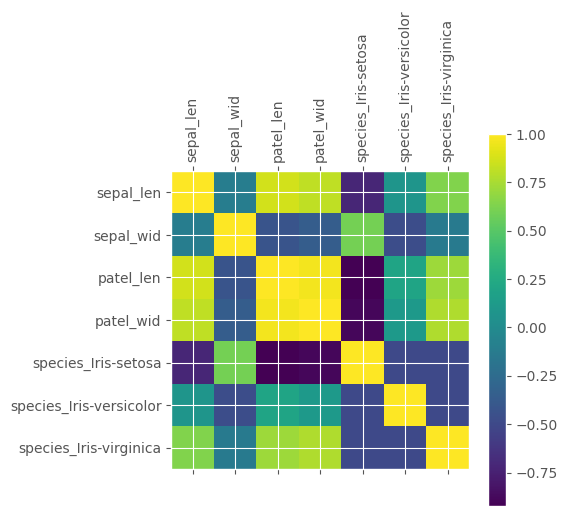

In [28]:
plt.style.use('ggplot')
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)),corr_mat.columns,rotation=90)
plt.yticks(range(len(corr_mat.columns)),corr_mat.columns)
plt.colorbar()

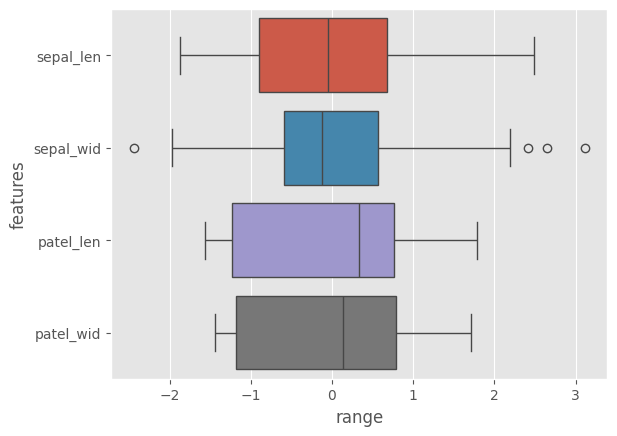

In [30]:
# plt.boxplot(x_train, showfliers=True, patch_artist=True, vert=False)
# color=["r","b","p","g"]
# for patch,color in zip(box["boxes"],color):
#     patch.set_facecolor(color)
# plt.show()

sns.boxplot(data= features, orient="y").set(xlabel="range",ylabel="features")
plt.show()

In [40]:
##copying Dataset
df1= df.copy(deep=False)
df1.head()


,sepal_len,sepal_wid,patel_len,patel_wid,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


In [41]:
## Function to remove outliers
def get_outliers(X):
    q1= np.quantile(X,0.25) #finding 1st qunatile
    q3= np.quantile(X,0.75) #finding 3st qunatile
    median = np.median(X)
    
    ##Find the iqr region
    iqr=q3-q1

    #Find upper & lower Bound
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    outliers= X[(X<= lower_bound) | (X>= upper_bound)]
    outliers_indices = np.where((X<= lower_bound) | (X>= upper_bound))

    return outliers, outliers_indices[0].tolist()
    

In [42]:
outliers, outliers_indices = get_outliers(features["sepal_wid"].to_numpy())
outliers, outliers_indices


(array([ 3.11468391,  2.42047502,  2.65187798, -2.43898725]), [15, 32, 33, 60])

In [43]:
df.shape

(150, 7)

In [44]:
##After dropling outliers
df1.drop(outliers_indices, inplace=True)
df1.shape

(146, 7)

In [45]:
##After droping the outliers Correlation matrics
corr_mat_1=df1.corr(method='pearson')
corr_mat_1

,sepal_len,sepal_wid,patel_len,patel_wid,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
sepal_len,1.000000,-0.113977,0.879374,0.822577,-0.729654,0.084011,0.634796
sepal_wid,-0.113977,1.000000,-0.397123,-0.329782,0.575605,-0.453515,-0.115433
patel_len,0.879374,-0.397123,1.000000,0.961755,-0.922202,0.189945,0.718958
patel_wid,0.822577,-0.329782,0.961755,1.000000,-0.886722,0.105792,0.767766
species_Iris-setosa,-0.729654,0.575605,-0.922202,-0.886722,1.000000,-0.489715,-0.497257
species_Iris-versicolor,0.084011,-0.453515,0.189945,0.105792,-0.489715,1.000000,-0.512934
species_Iris-virginica,0.634796,-0.115433,0.718958,0.767766,-0.497257,-0.512934,1.000000


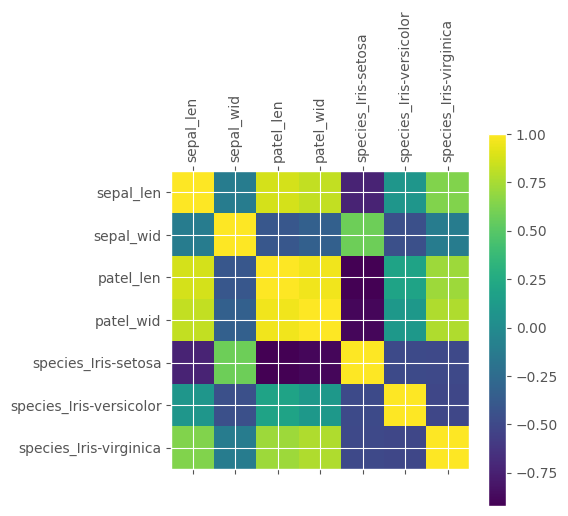

In [46]:
plt.style.use('ggplot')
plt.matshow(corr_mat_1)
plt.xticks(range(len(corr_mat_1.columns)),corr_mat_1.columns,rotation=90)
plt.yticks(range(len(corr_mat_1.columns)),corr_mat_1.columns)
plt.colorbar()

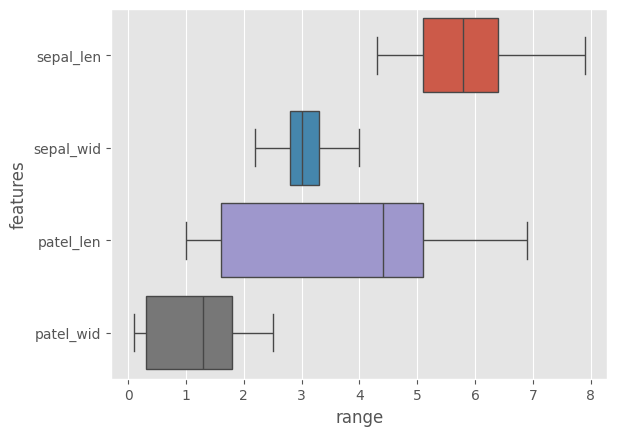

In [47]:
sns.boxplot(data= df1.iloc[:,:-3], orient="y").set(xlabel="range",ylabel="features")
plt.show()

In [ ]:
### More Data Visualiztion stuff can be done in this project.

In [51]:
features= df1.iloc[:,:-3]
target=df1.iloc[:,[-1,-2,-3]]

In [52]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=43,shuffle=True)

In [53]:
y_train.head()

,species_Iris-virginica,species_Iris-versicolor,species_Iris-setosa
41,0.0,0.0,1.0
98,0.0,1.0,0.0
61,0.0,1.0,0.0
134,1.0,0.0,0.0
76,0.0,1.0,0.0


In [54]:
train_df1 = x_train.join(y_train) 
train_df1.head()

,sepal_len,sepal_wid,patel_len,patel_wid,species_Iris-virginica,species_Iris-versicolor,species_Iris-setosa
41,4.5,2.3,1.3,0.3,0.0,0.0,1.0
98,5.1,2.5,3.0,1.1,0.0,1.0,0.0
61,5.9,3.0,4.2,1.5,0.0,1.0,0.0
134,6.1,2.6,5.6,1.4,1.0,0.0,0.0
76,6.8,2.8,4.8,1.4,0.0,1.0,0.0


In [55]:
##model Building
logistic = LogisticRegression(solver='liblinear', max_iter=1000)
model= OneVsRestClassifier(logistic)
model.fit(x_train,y_train)
y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

In [56]:
train_report = classification_report(y_train, y_pred_train, zero_division=1, output_dict=True)
train_df1_report = pd.DataFrame(train_report).transpose()
train_df1_report

,precision,recall,f1-score,support
0,0.930233,1.000000,0.963855,40.0
1,0.550000,0.275000,0.366667,40.0
2,1.000000,1.000000,1.000000,36.0
micro avg,0.878788,0.750000,0.809302,116.0
macro avg,0.826744,0.758333,0.776841,116.0
weighted avg,0.820770,0.750000,0.769146,116.0
samples avg,0.939655,0.750000,0.721264,116.0


In [57]:
test_report = classification_report(y_test,y_pred,zero_division=1,output_dict=True)
test_df1_report = pd.DataFrame(test_report).transpose()
test_df1_report

,precision,recall,f1-score,support
0,0.909091,1.000000,0.952381,10.0
1,0.500000,0.333333,0.400000,9.0
2,1.000000,1.000000,1.000000,11.0
micro avg,0.857143,0.800000,0.827586,30.0
macro avg,0.803030,0.777778,0.784127,30.0
weighted avg,0.819697,0.800000,0.804127,30.0
samples avg,0.916667,0.800000,0.766667,30.0
